In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist

4422102/4422102 [==============================] - 0s 0us/step


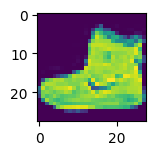

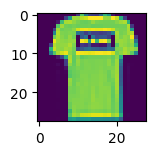

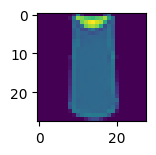

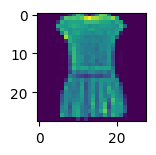

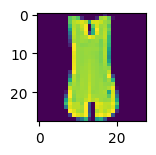

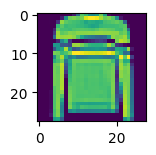

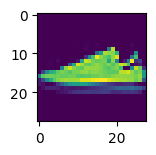

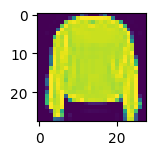

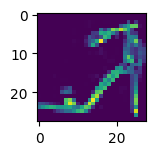

In [2]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_X[i])
  plt.show()

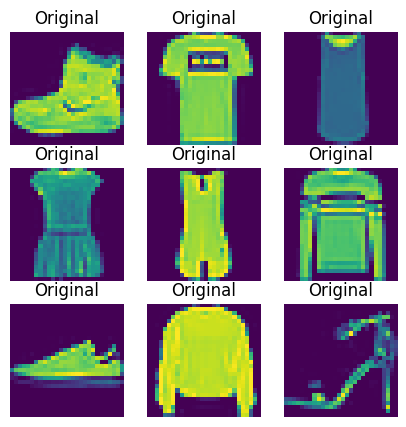

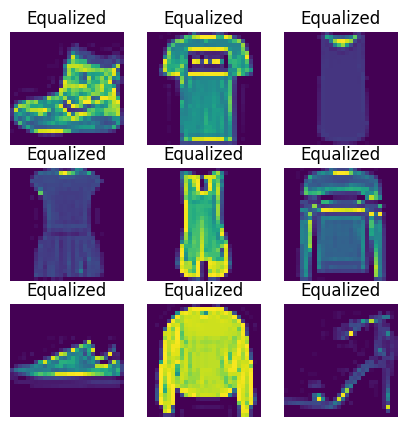

In [15]:
def get_pixel_frequency(image):
    pixel_frequency = np.zeros(256)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel_val = image[row][col]
            pixel_frequency[pixel_val] += 1
    return pixel_frequency

pixel_freq = get_pixel_frequency(train_X[0])

L = 256

pixel_pdf = pixel_freq / np.sum(pixel_freq)
pixel_cumsum = np.cumsum(pixel_pdf)
bits_cumsum = (L - 1) * pixel_cumsum
pixel_map = np.fix(bits_cumsum).astype(int)

output_images = []
for img in train_X:
    output_image = np.zeros_like(img)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            pixel_val = img[row][col]
            output_image[row][col] = pixel_map[pixel_val]
    output_images.append(output_image)

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_X[i])
    plt.title("Original")
    plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(output_images[i])
    plt.title("Equalized")
    plt.axis('off')
plt.show()

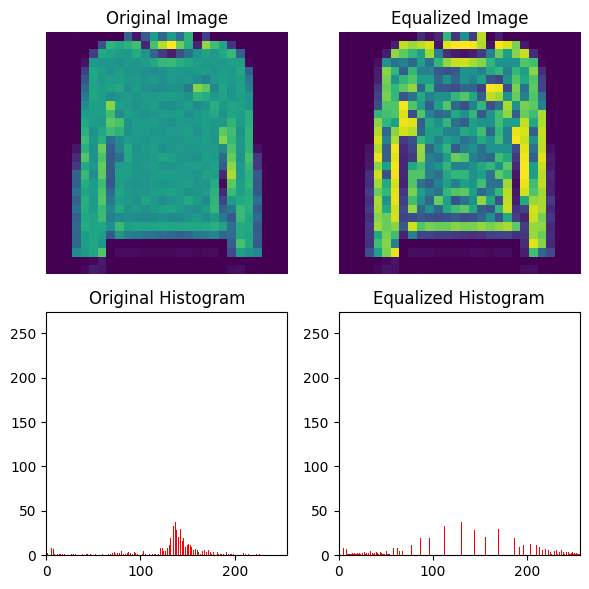

In [17]:
random_index = np.random.randint(0, len(train_X))
image = train_X[random_index]

plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image

equalized_image = histogram_equalization(image)

plt.subplot(2, 2, 2)
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


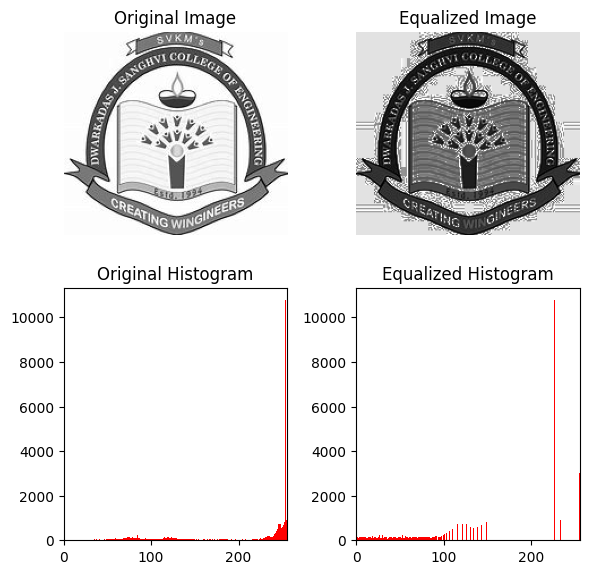

In [19]:
image = cv2.imread("/content/djjj'.jfif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image

equalized_image = histogram_equalization(image)

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.title('Original Histogram')

plt.subplot(2, 2, 4)
plt.hist(equalized_image.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()
